In [58]:
# Importando bibliotecas
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import shutil
import pandas as pd
from random import randint
from collections import Counter

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, Flatten, Reshape


In [2]:
input_img = Input(shape=(224,224, 3))
# Encoder

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(encoded)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x)

# Montando o modelo completo
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

encoder_model = Model(input_img, encoded)



In [47]:
data_path = r'C:/Users/tiago/OneDrive/UNICAMP/ML Nao Supervisionado/Atividade 3/cuts/Wound_dataset/trabalho/'



entries = os.listdir(data_path)
valid_extensions = ('.jpg')
machucados = [] #pegamos o caminho para todas as imagens
dicionario = {} #criaremos um dicionario com o nome da imagem como key e sua matriz como value

for i in entries:
    full_path = os.path.join(data_path, i)
    machucados.append(full_path) 
    #na lista "machucados" temos todos os caminhos ate as imagens

for imagem in machucados:
    try:
        im = load_img(imagem, target_size=(224,224)) #lemos a imagem redimensionando seu tamanho para que elas sejam todas comparaveis
        im = np.array(im) #transforma em array
        im_res = im.reshape(1,224,224,3) # temos 224 de altura, 224 de largura e 3 canais de cor
        vetor_imagem = preprocess_input(im_res)
        feature = encoder_model.predict(vetor_imagem) #aplica o modelo na imagem
        nome = os.path.basename(imagem)
        dicionario[nome] = feature # adiciona o feature do modelo no nome no dicionario
    except Exception as e:
            continue

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

In [48]:
imagens = np.array(list(dicionario.values())) #array com as matrizes de cada imagem
imagens = imagens.reshape(-1,4096) # transformamos os valores das matrizes de cada imagem em um vetor com 4096 colunas
nomes = np.array(list(dicionario.keys())) #nomes dos arquivos

In [90]:
#PCA
pca = PCA(n_components= 10)
pca.fit(imagens)
x = pca.fit_transform(imagens)

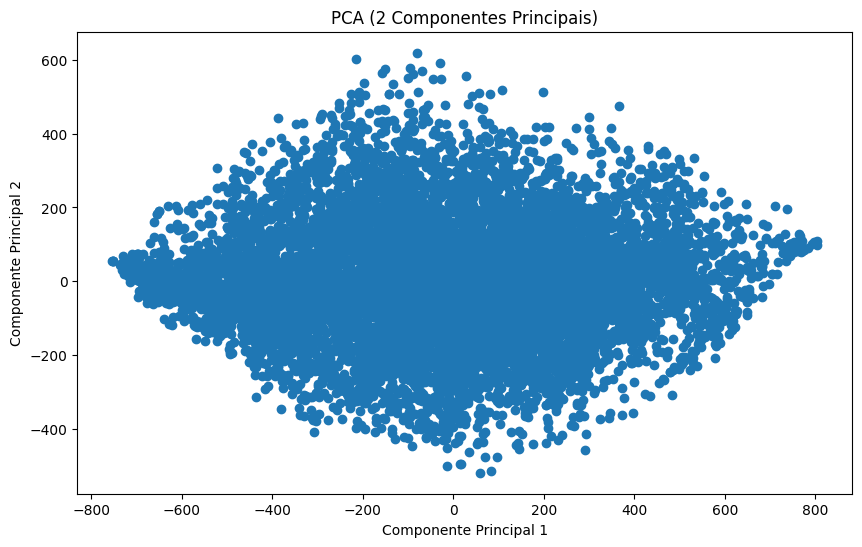

In [86]:
# plot pca
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA (2 Componentes Principais)')
plt.show()


Text(0, 0.5, 'Variância Acumulada')

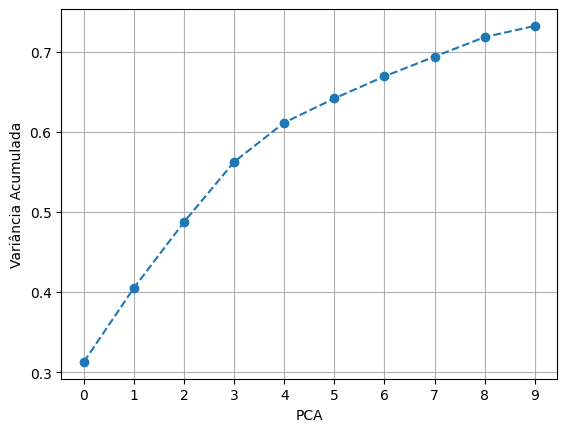

In [91]:
# variancia acumulada PCA

var_acumulada = np.cumsum(pca.explained_variance_ratio_)
plt.plot(var_acumulada, marker='o', linestyle='--')
plt.xticks(np.arange(0, 10,1))
plt.grid(True)
plt.xlabel("PCA")
plt.ylabel("Variância Acumulada")

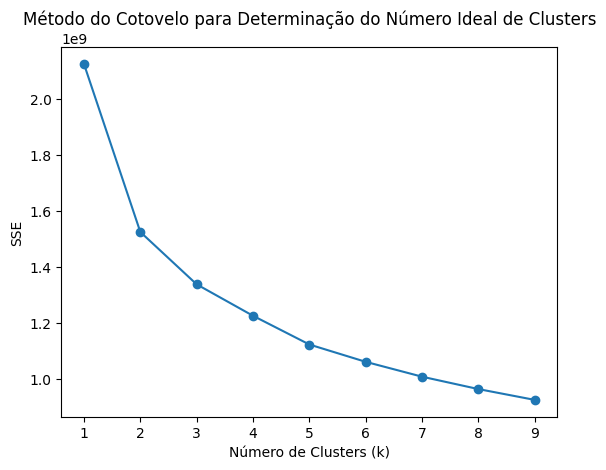

In [51]:
#Elbow
sse = []
k_values = range(1,10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

plt.plot(k_values, sse, marker = "o")
plt.xlabel('Número de Clusters (k)')
plt.ylabel('SSE')
plt.title('Método do Cotovelo para Determinação do Número Ideal de Clusters')
plt.show()

In [52]:
#aplicando kmeans
kmeans = KMeans(n_clusters=4)  
clusters = kmeans.fit(x)
centroides = kmeans.cluster_centers_

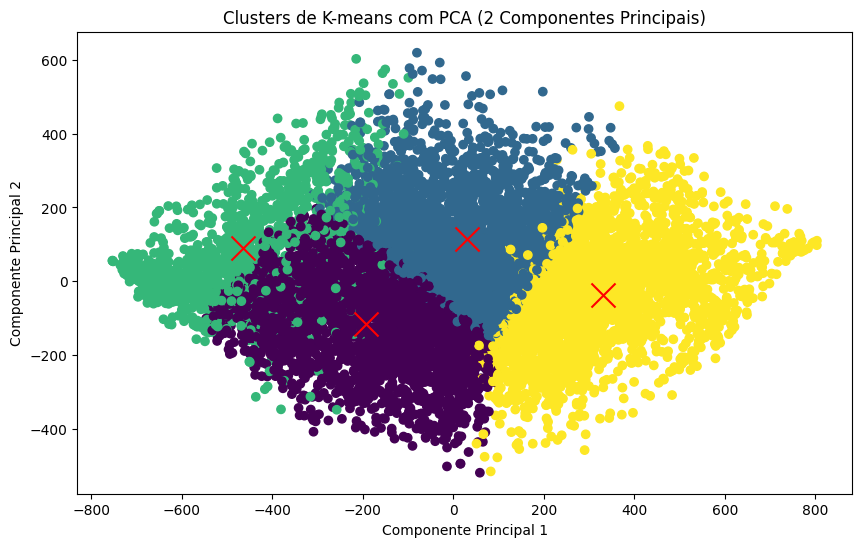

In [92]:
#plotando clusters e centroides
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], s=300, c='red', marker='x')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters de K-means com PCA (2 Componentes Principais)')
plt.show()


In [54]:
#clusters
groups = {}

for file, cluster in zip(nomes,clusters.labels_):
    if cluster not in groups.keys():
        groups[cluster] = [] #abrimos um novo cluster no dicionario
        groups[cluster].append(file) #adicionamos a imagem no cluster
    else:
        groups[cluster].append(file) #caso ja exista o cluster apenas adionamos a imagem


In [55]:
groups[3]

['abrasions (1).jpg',
 'abrasions (10).jpg',
 'abrasions (11).jpg',
 'abrasions (12).jpg',
 'abrasions (13).jpg',
 'abrasions (14).jpg',
 'abrasions (15).jpg',
 'abrasions (16).jpg',
 'abrasions (17).jpg',
 'abrasions (18).jpg',
 'abrasions (19).jpg',
 'abrasions (2).jpg',
 'abrasions (20).jpg',
 'abrasions (21).jpg',
 'abrasions (22).jpg',
 'abrasions (23).jpg',
 'abrasions (24).jpg',
 'abrasions (25).jpg',
 'abrasions (26).jpg',
 'abrasions (27).jpg',
 'abrasions (28).jpg',
 'abrasions (29).jpg',
 'abrasions (3).jpg',
 'abrasions (35).jpg',
 'abrasions (36).jpg',
 'abrasions (37).jpg',
 'bruises (107).jpg',
 'bruises (108).jpg',
 'bruises (109).jpg',
 'bruises (11).jpg',
 'bruises (45).jpg',
 'bruises (46).jpg',
 'bruises (47).jpg',
 'bruises (48).jpg',
 'bruises (49).jpg',
 'bruises (5).jpg',
 'bruises (50).jpg',
 'bruises (51).jpg',
 'bruises (52).jpg',
 'bruises (53).jpg',
 'bruises (54).jpg',
 'bruises (55).jpg',
 'bruises (56).jpg',
 'bruises (57).jpg',
 'bruises (58).jpg',
 'br

In [74]:
# Contador para as primeiras palavras
freq = {}

for grupo in groups.keys():
    contador = Counter()
    for arquivo in groups[grupo]:
        primeira_palavra = arquivo.split(' ')[0]
        contador[primeira_palavra] += 1
    freq[grupo] = contador

3
abrasions (1).jpg
abrasions (10).jpg
abrasions (11).jpg
abrasions (12).jpg
abrasions (13).jpg
abrasions (14).jpg
abrasions (15).jpg
abrasions (16).jpg
abrasions (17).jpg
abrasions (18).jpg
abrasions (19).jpg
abrasions (2).jpg
abrasions (20).jpg
abrasions (21).jpg
abrasions (22).jpg
abrasions (23).jpg
abrasions (24).jpg
abrasions (25).jpg
abrasions (26).jpg
abrasions (27).jpg
abrasions (28).jpg
abrasions (29).jpg
abrasions (3).jpg
abrasions (35).jpg
abrasions (36).jpg
abrasions (37).jpg
bruises (107).jpg
bruises (108).jpg
bruises (109).jpg
bruises (11).jpg
bruises (45).jpg
bruises (46).jpg
bruises (47).jpg
bruises (48).jpg
bruises (49).jpg
bruises (5).jpg
bruises (50).jpg
bruises (51).jpg
bruises (52).jpg
bruises (53).jpg
bruises (54).jpg
bruises (55).jpg
bruises (56).jpg
bruises (57).jpg
bruises (58).jpg
bruises (59).jpg
bruises (6).jpg
bruises (60).jpg
bruises (61).jpg
bruises (62).jpg
bruises (63).jpg
bruises (64).jpg
bruises (65).jpg
bruises (91).jpg
bruises (92).jpg
bruises (93).

In [75]:
for grupo, contador in freq.items():
    print(f"Contagens no {grupo}: {contador}")

Contagens no 3: Counter({'bruises': 33, 'abrasions': 26})
Contagens no 1: Counter({'abrasions': 30, 'bruises': 30})
Contagens no 2: Counter({'bruises': 26, 'abrasions': 6})
Contagens no 0: Counter({'bruises': 33, 'abrasions': 23})


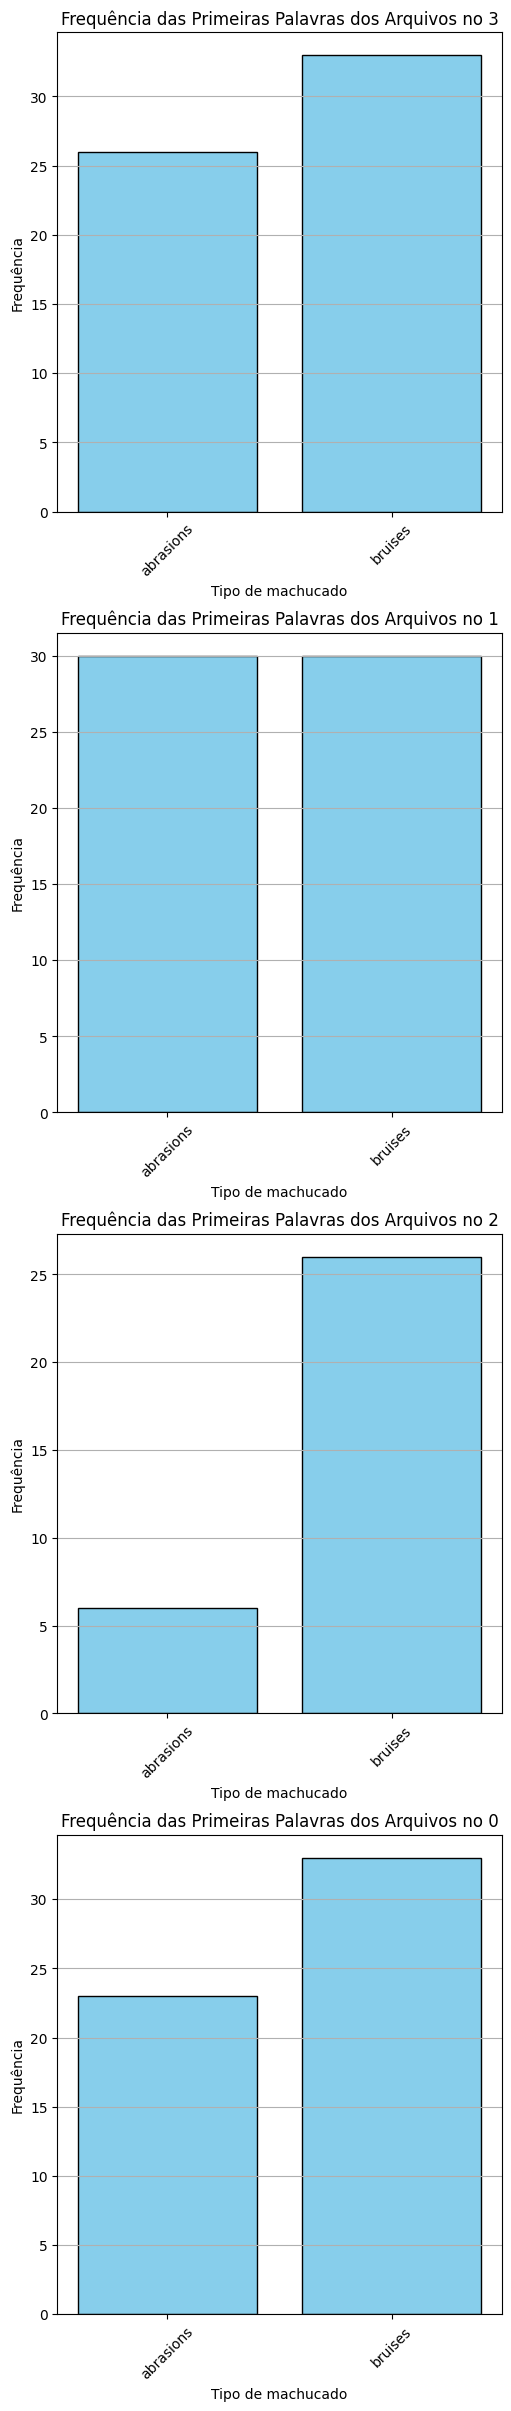

In [82]:
num_grupos = len(groups)
fig, axs = plt.subplots(num_grupos, 1, figsize=(5, 6 * num_grupos), constrained_layout=True)

for ax, (grupo, contador) in zip(axs, freq.items()):
    palavras = list(contador.keys())
    frequencias = list(contador.values())
    
    ax.bar(palavras, frequencias, color='skyblue', edgecolor='black')
    ax.set_xlabel('Tipo de machucado')
    ax.set_ylabel('Frequência')
    ax.set_title(f'Frequência das Primeiras Palavras dos Arquivos no {grupo}')
    ax.set_xticks(range(len(palavras)))
    ax.set_xticklabels(palavras, rotation=45)
    ax.grid(axis='y')

# Exibir os histogramas
plt.show()

In [83]:
#salvando em pastar por cluster
diretorio_salvar = 'C:/Users/tiago/OneDrive/UNICAMP/ML Nao Supervisionado/Atividade 3/cluster/'

diretorio_origem = 'C:/Users/tiago/OneDrive/UNICAMP/ML Nao Supervisionado/Atividade 3/cuts/Wound_dataset/trabalho/'


for i in range(len(groups)):
    path = os.path.join(diretorio_salvar,str(i))
    print(path)
    if not os.path.exists(path):
        os.makedirs(path)

for pasta in groups.keys():
    for file in groups[pasta]:
        print(file)
        root = os.path.join(diretorio_origem, file)
        path = os.path.join(diretorio_salvar, str(pasta))
        
        shutil.copy(root, path)


C:/Users/tiago/OneDrive/UNICAMP/ML Nao Supervisionado/Atividade 3/cluster/0
C:/Users/tiago/OneDrive/UNICAMP/ML Nao Supervisionado/Atividade 3/cluster/1
C:/Users/tiago/OneDrive/UNICAMP/ML Nao Supervisionado/Atividade 3/cluster/2
C:/Users/tiago/OneDrive/UNICAMP/ML Nao Supervisionado/Atividade 3/cluster/3
abrasions (1).jpg
abrasions (10).jpg
abrasions (11).jpg
abrasions (12).jpg
abrasions (13).jpg
abrasions (14).jpg
abrasions (15).jpg
abrasions (16).jpg
abrasions (17).jpg
abrasions (18).jpg
abrasions (19).jpg
abrasions (2).jpg
abrasions (20).jpg
abrasions (21).jpg
abrasions (22).jpg
abrasions (23).jpg
abrasions (24).jpg
abrasions (25).jpg
abrasions (26).jpg
abrasions (27).jpg
abrasions (28).jpg
abrasions (29).jpg
abrasions (3).jpg
abrasions (35).jpg
abrasions (36).jpg
abrasions (37).jpg
bruises (107).jpg
bruises (108).jpg
bruises (109).jpg
bruises (11).jpg
bruises (45).jpg
bruises (46).jpg
bruises (47).jpg
bruises (48).jpg
bruises (49).jpg
bruises (5).jpg
bruises (50).jpg
bruises (51).jpg